#
# **Água no balde girando: um estudo sobre hidrodinâmica**
#### Grupo: Danielle Chagas, Eduarda Carvalho, Gustavo Verçosa, Isabela Beneti e Vitor Barelli
#### Prof. Felipe Crasto

---

No presente notebook, buscamos aplicar a fórmula obtida, através da análise de forças aplicadas em uma gota no problema do balde giratório, que descreve o formato do fluído presente nesse balde. A fórmula, demosntrada no trabalho, é dada por:

$$y(x)= \frac{\omega^2 x^2}{2g} - \frac{\omega^2 d^2}{24g}$$

Para tanto, desenvolvemos duas funções em python:
>  `parabola_para_velocidade_angular`: calcula características do movimento do balde (velocidade angular e diâmetro do recipiente) a partir da equação da parábola;

>  `velocidade_angular_para_parabola`: calcula a equação da parábola a partir de características do movimento do balde (velocidade angular e diâmetro do recipiente).


---
### Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Obtendo características do movimento a partir da parábola

In [44]:
def parabola_para_velocidade_angular(funcao):
    """ Função que calcula os valores de velocidade angular e do diâmetro de um recipente que gira em seu eixo de simetria
    
    Args: 
    
    - funcao: função de segundo grau que descreve a parábola formada pelo líquido dentro do recipiente
    
    Retorna: valor da velocidade angular desse recipiente em rad/s e do diâmetro do recipiente em metros """
    
    # Calcula a derivada da função
    def derivada(x):
        h = 0.0001
        return (funcao(x + h) - funcao(x)) / h
    # Extrai o coeficientes angular e linear da equação
    coef_angular = derivada(1.0)/2
    coef_linear = funcao(0.0)
    # Calcula velocidade angular e diâmetro
    velocidade_angular= (coef_angular*2*9.8)**(1/2)
    diametro= (-((24*9.8*coef_linear)/(velocidade_angular**2)))**(1/2)
    print("A velocidade angular é de", velocidade_angular, "rad/s. Já o diâmetro desse recipiente é de", diametro, "metros")

In [45]:
def funcao(x):
    return 47.4*(x**2) - 0.07
parabola_para_velocidade_angular(funcao)

A velocidade angular é de 30.48091947430902 rad/s. Já o diâmetro desse recipiente é de 0.1331188677675225 metros


## Obtendo a  parábola a partir de características do movimento

In [55]:
def velocidade_angular_para_parabola(w, d):
    """ Função que obtem a parábola formada pelo líquido dentro do recipiente a partir dos valores de velocidade angular 
    e do diâmetro de um recipente que gira em seu eixo de simetria
    
    Args: 
    
    - w: velocidade angular do recipiente
    - d: diâmetro do recipiente
    
    
    Retorna: função de segundo grau que descreve a parábola formada pelo líquido dentro do recipiente e seu gráfico """
    # Calcula a derivada da função
    coef_angular = (w**2)/(2*9.8)
    coef_linear = -((d**2)*(w**2)/(24*9.8))
    # Cria um array de valores x
    x = np.linspace(-d/2, d/2,1000)

    # Calcula os valores correspondentes de y (equação de segundo grau)
    y = coef_angular * x**2 + coef_linear
    print("A equação que descreve a parábola formada pelo líquido é y=", coef_angular, "x²", coef_linear, "e seu formato é:")
    # Cria o plot
    plt.plot(x, y)
    x_min = -coef_linear / (2 * coef_angular)
    y_min = coef_angular * x_min**2 + coef_linear * x_min
    plt.fill_between(x, np.min(y), y, where=(x <= x_min), color='aqua', alpha=0.3)  # Preenche a área abaixo da curva com azul
    plt.fill_between(x, np.min(y), y, where=(x > x_min), color='aqua', alpha=0.3)  # Preenche a área acima da curva com azul
    plt.title('Gráfico da Equação de Segundo Grau')
    plt.title('Formato da parábola formada pelo líquido')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-d/2, d/2)

    # Mostra o plot
    plt.show()

A equação que descreve a parábola formada pelo líquido é y= 0.0510204081632653 x² -7.185374149659864e-05 e seu formato é:


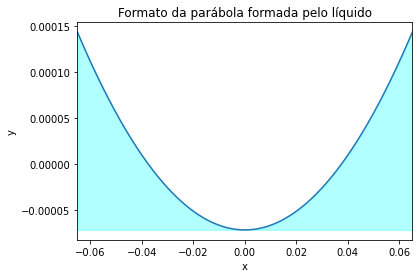

In [60]:
 velocidade_angular_para_parabola(1, 0.13)

---
## Conclusões

Depois eu tiro que preguiça credo